
Import the dependencies


In [53]:
#libraries
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler


### EXPLORING DATA

In [54]:
#load the used dataset
data_frame = pd.read_csv('data_set.csv')

In [55]:
# display (rows,columns)
data_frame.shape

(2000, 15)

In [56]:
data_frame.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [57]:
data_frame['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

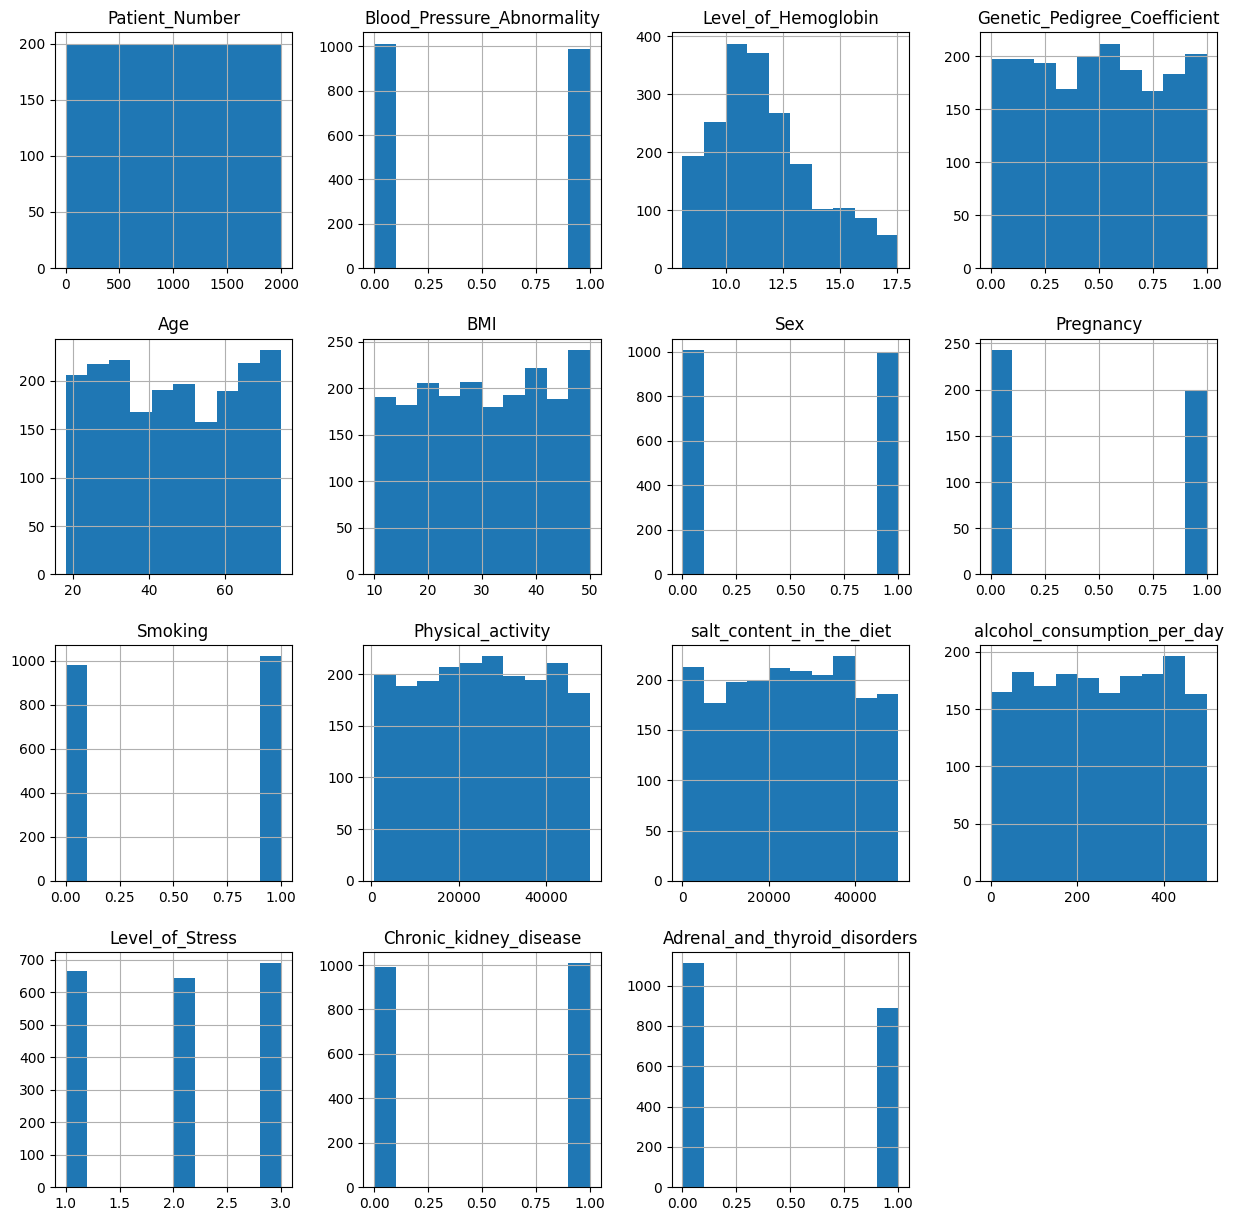

In [58]:
plt.rcParams['figure.figsize'] = [15, 15]
data_frame.hist()
plt.show()

<Axes: >

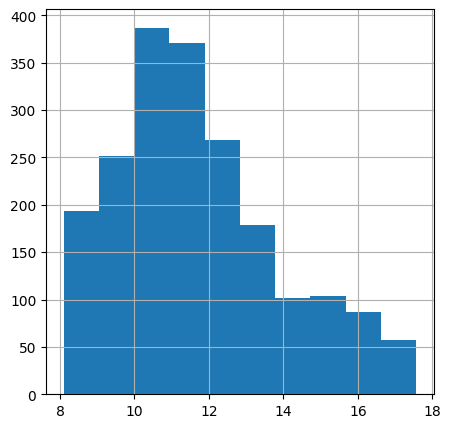

In [59]:
#positive(right) skewed distribution this means that mean>median>mode
#histogram with one peak,which referred to as unimodal
#this plot shows that we remove outliers
plt.rcParams['figure.figsize'] = [5, 5]
data_frame['Level_of_Hemoglobin'].hist()

C:\Users\biruni\AppData\Local\Temp\ipykernel_13920\1214062323.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[data_frame['Blood_Pressure_Abnormality']==0]['Level_of_Hemoglobin'], kde_kws={"shade":True}, color='red',hist=False)
c:\Users\biruni\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


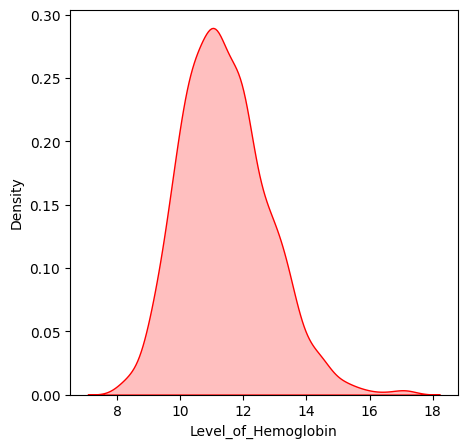

In [60]:
# histogram for normal 

plt.rcParams['figure.figsize'] = [5, 5]
sns.distplot(data_frame[data_frame['Blood_Pressure_Abnormality']==0]['Level_of_Hemoglobin'], kde_kws={"shade":True}, color='red',hist=False)
plt.show()

In [61]:
# detect the outliers using boxplot
# Visualizing dataset and also checking for outliers 
def PLOTBOXPLOT():
    fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize = (20, 15))
    index = 0

    ax = ax.flatten()
    for col, value in data_frame.items():
        sns.boxplot(y=col, data=data_frame, ax=ax[index])
        index += 1

    plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

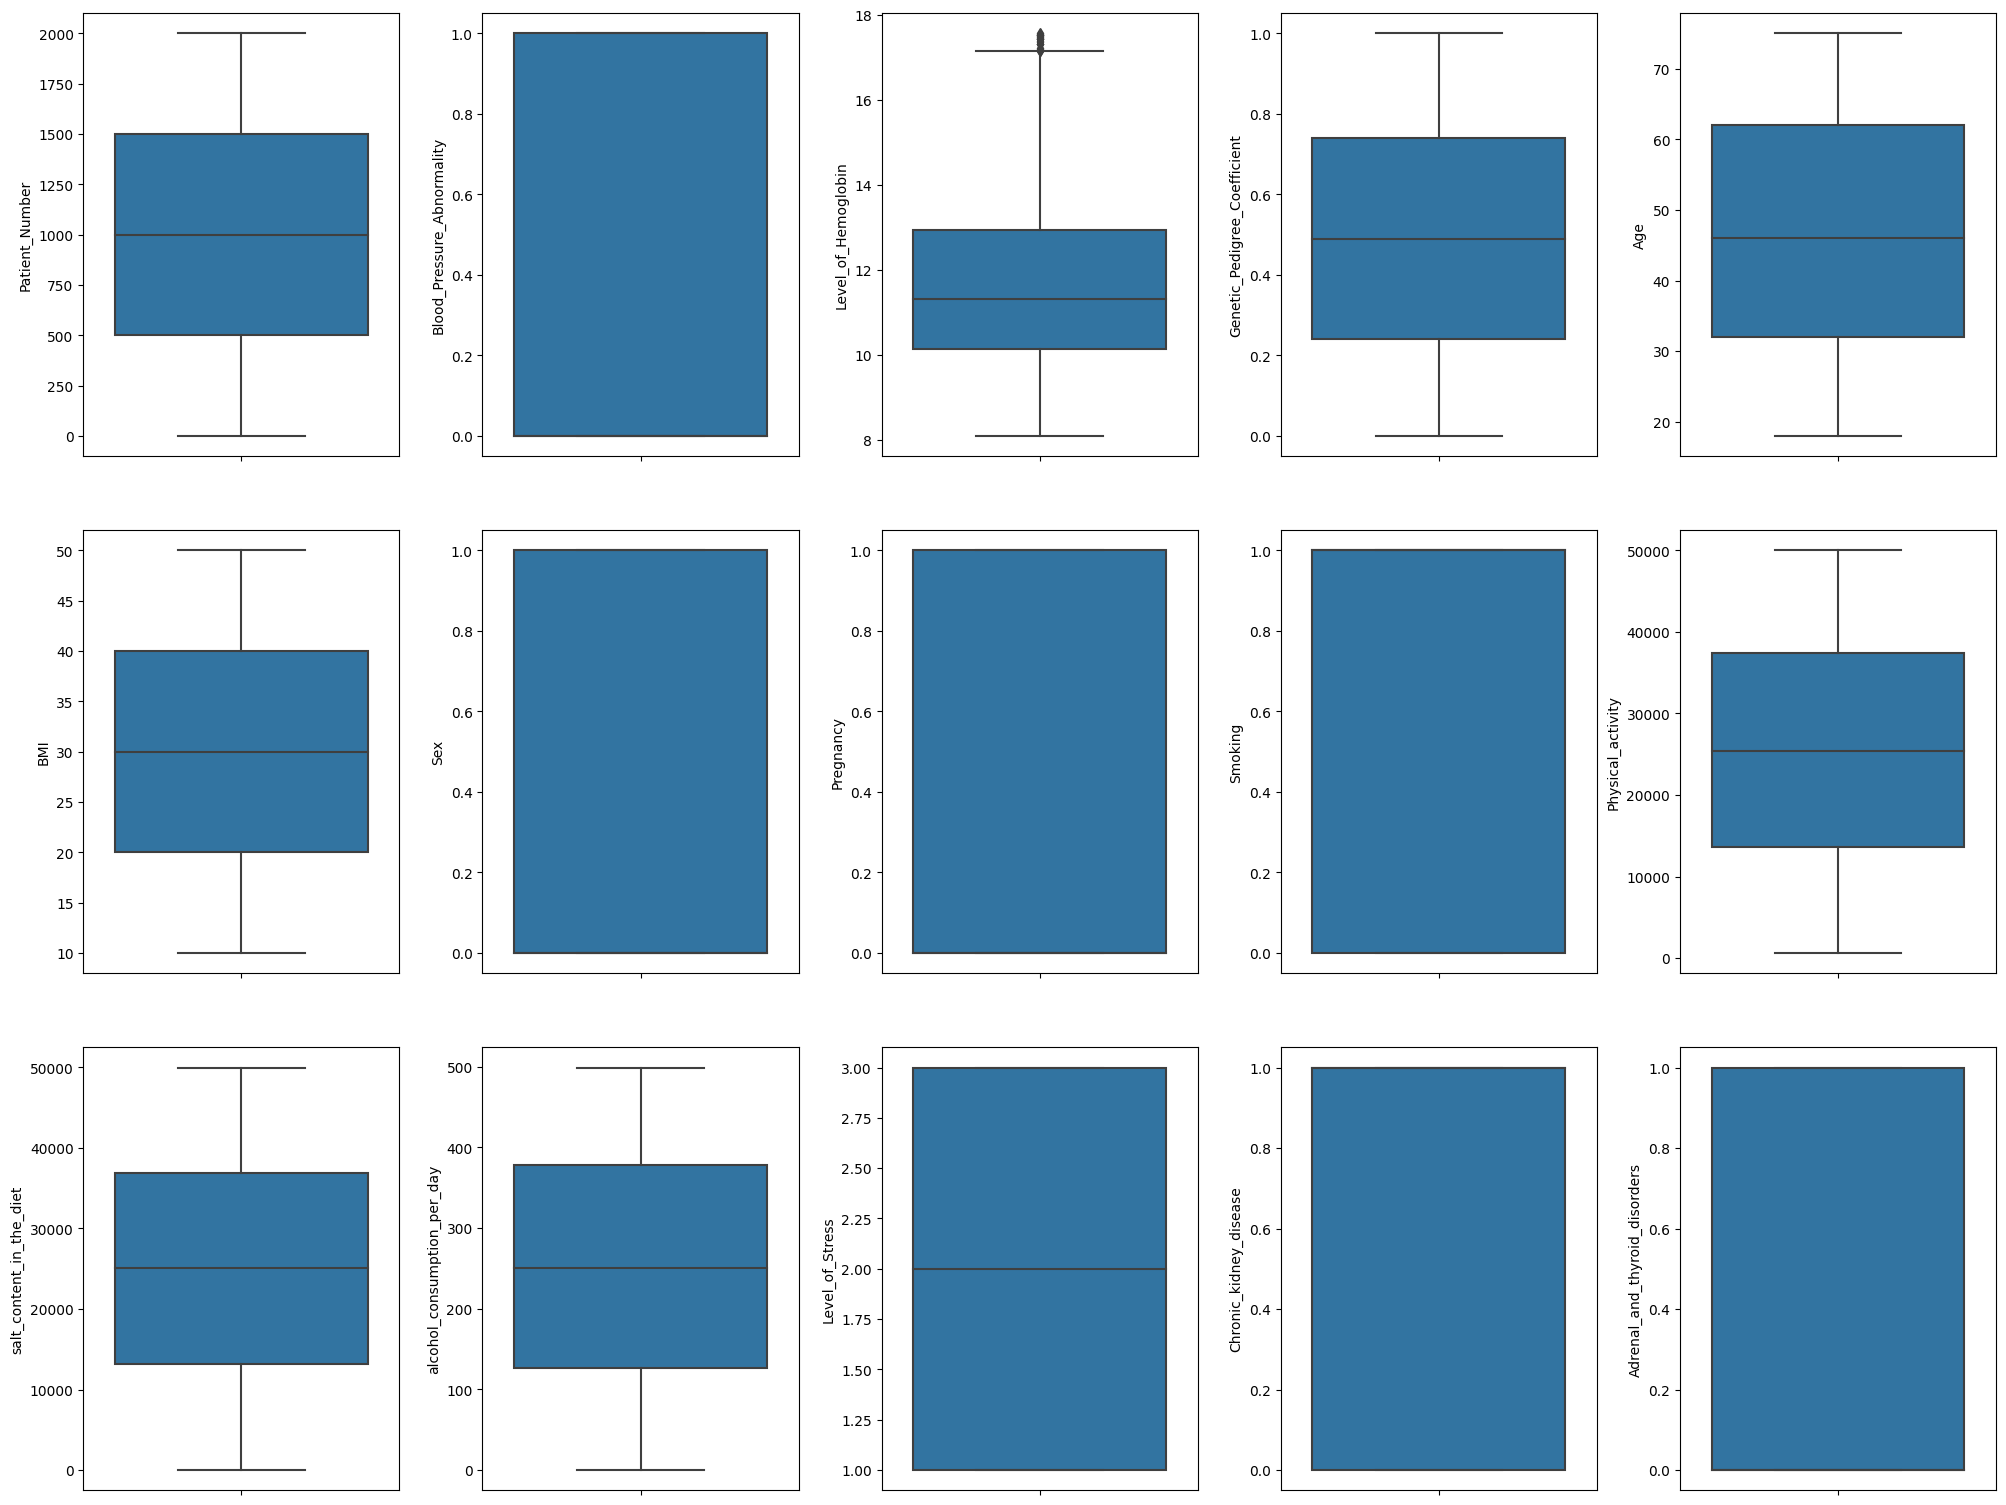

In [62]:
PLOTBOXPLOT()

In [63]:
def Remove_Outlier_Indices(data_frame):
    Q1 = data_frame.quantile(0.25)
    Q3 = data_frame.quantile(0.75)
    IQR = Q3 - Q1
    trueList = (data_frame > (Q1 - 1.5 * IQR)) & (data_frame < (Q3 + 1.5 * IQR))
    return trueList

In [64]:
for _ in range(15):
    noneoutlayerList = Remove_Outlier_Indices(data_frame)
    data_frame = data_frame[noneoutlayerList]

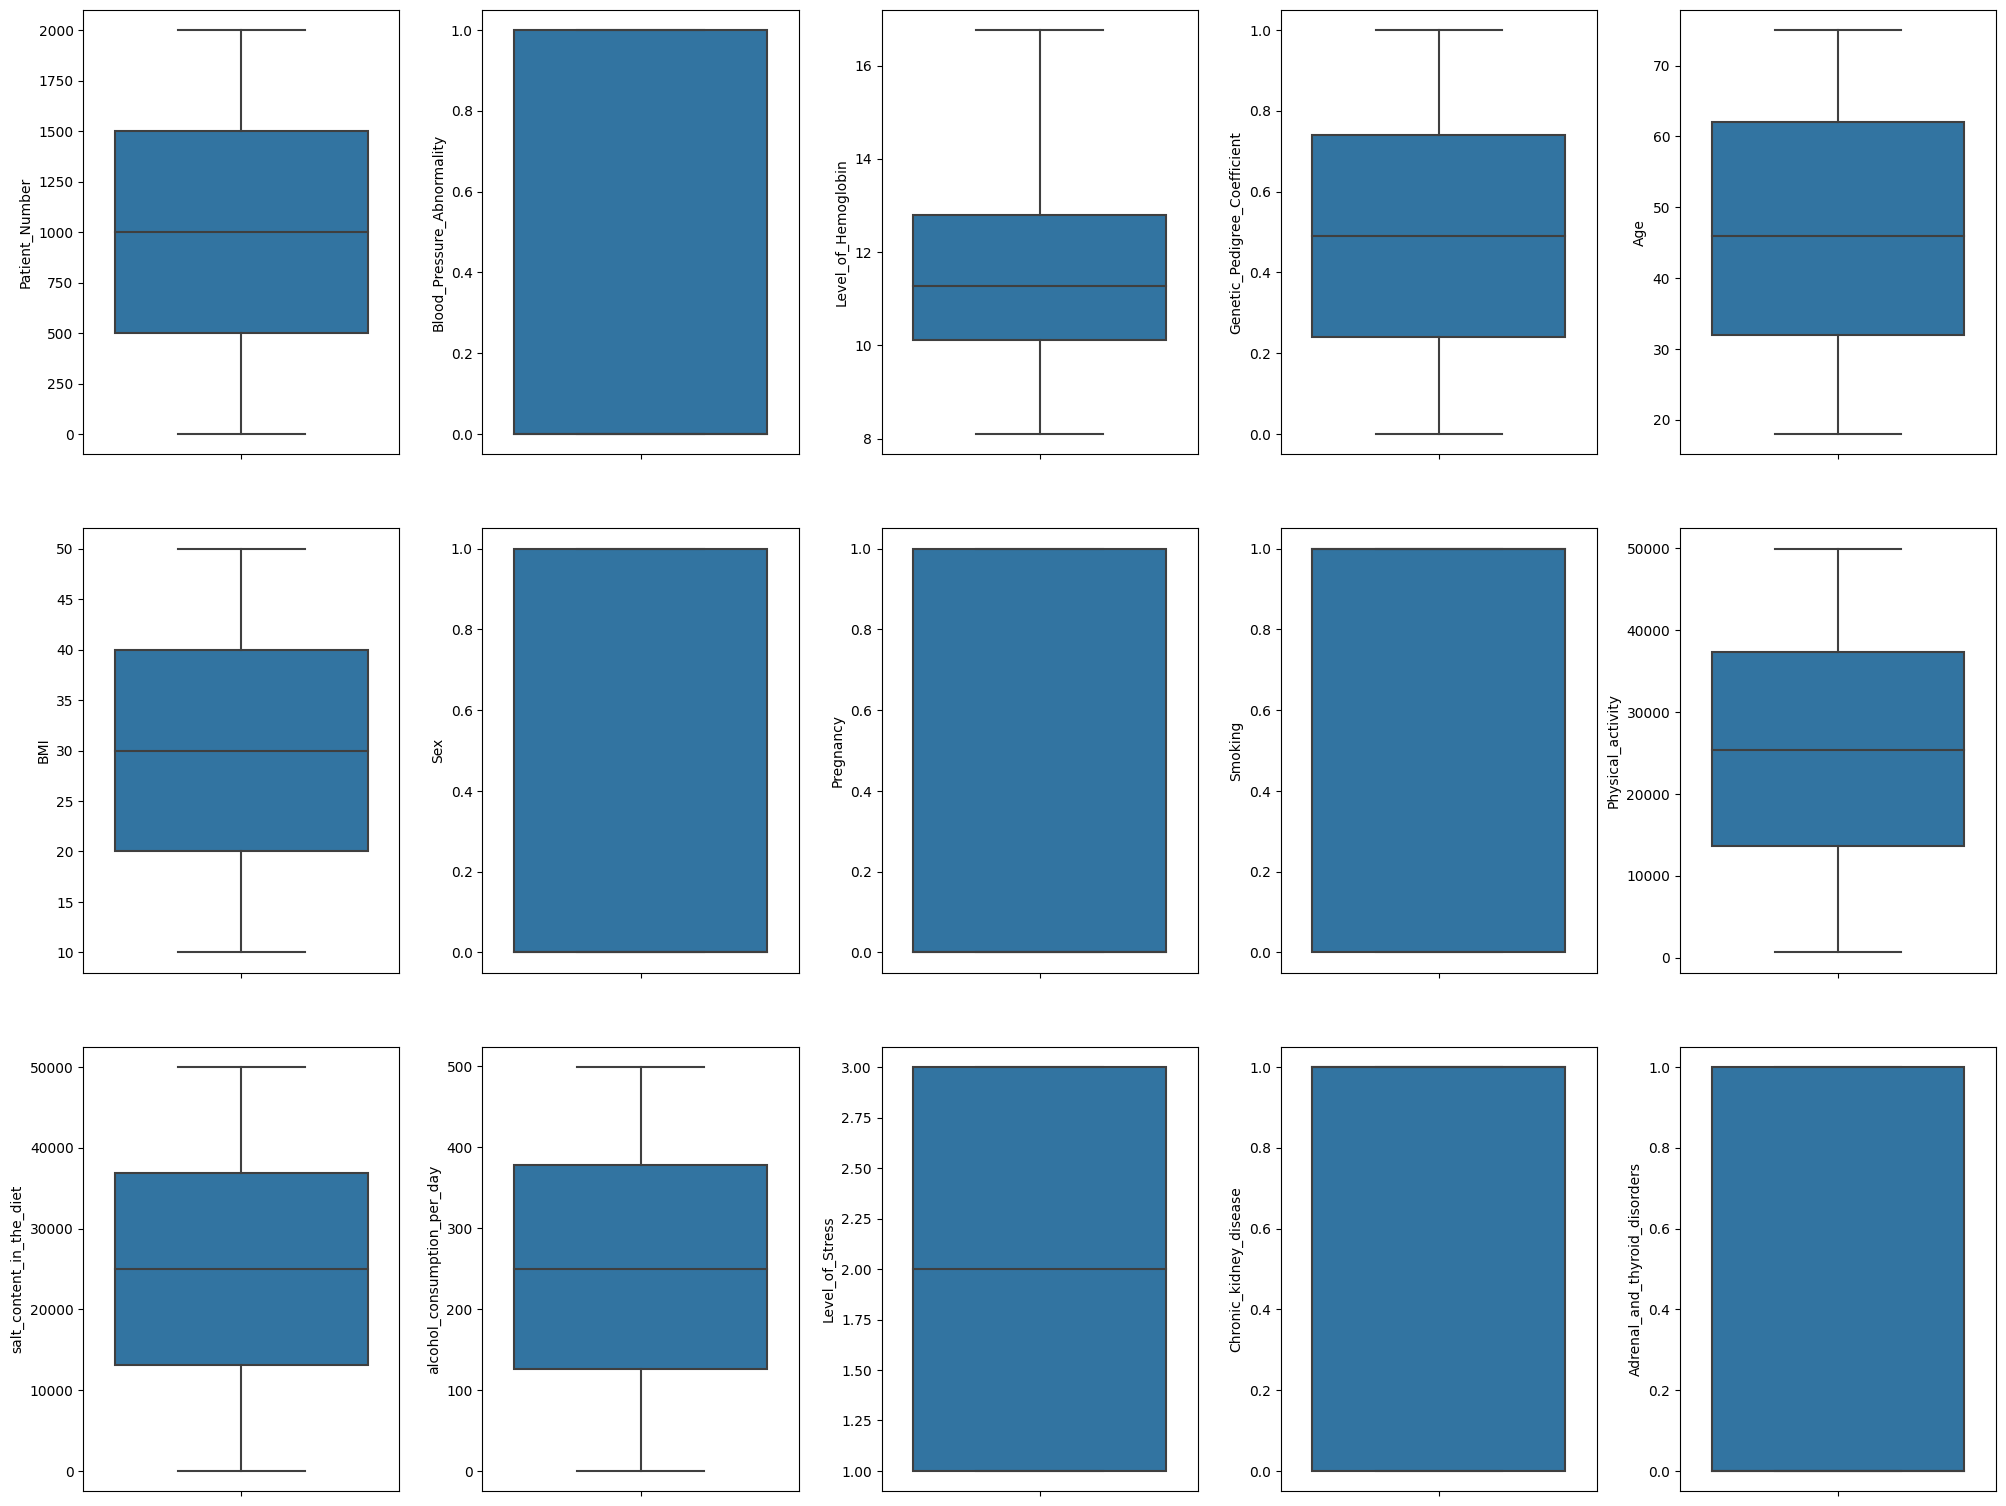

In [65]:
PLOTBOXPLOT()

<Axes: >

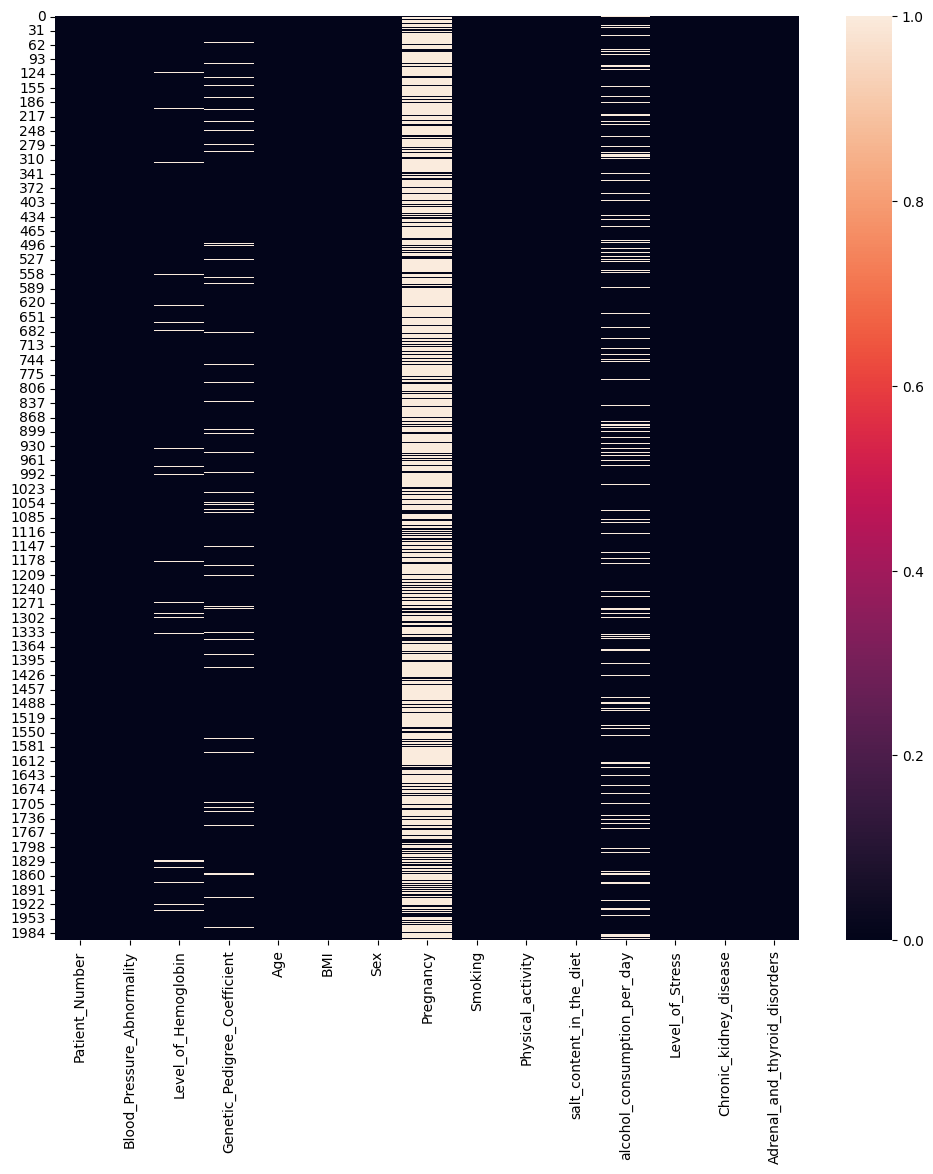

In [66]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_frame.isnull())

In [67]:
#drop the unneeded columns
#we will remove the 'Patient_Number' column 
#we will remove the 'pregnancy' column bec. it consist of 1558 nulls and its not that important
#but we wont remove 'Genetic_Pedigree_Coefficient' and 'alcohol_consumption_per_day' columns bec. they are a main factor in the blood pressure disease
data_frame = data_frame.drop(['Patient_Number', 'Pregnancy'], axis=1 )
data_frame.shape

(2000, 13)

In [68]:
data_frame = data_frame.fillna(data_frame.mean())

In [69]:
# show dataset info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Smoking                        2000 non-null   int64  
 7   Physical_activity              2000 non-null   int64  
 8   salt_content_in_the_diet       2000 non-null   int64  
 9   alcohol_consumption_per_day    2000 non-null   float64
 10  Level_of_Stress                2000 non-null   int64  
 11  Chronic_kidney_disease         2000 non-null   int64  
 12  Adrenal_and_thyroid_disorders  2000 non-null   i

In [70]:
data_frame.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000
mean,0.493500,11.584189,0.494817,46.558500,30.081500,0.496000,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500
std,0.500083,2.022907,0.284944,17.107832,11.761208,0.500109,0.500035,14015.439623,14211.692586,134.676187,0.823822,0.5001,0.496922
min,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,0.000000,10.147500,0.250000,32.000000,20.000000,0.000000,0.000000,13605.750000,13151.750000,144.000000,1.000000,0.0000,0.000000
50%,0.000000,11.330000,0.494817,46.000000,30.000000,0.000000,1.000000,25353.000000,25046.500000,251.008532,2.000000,1.0000,0.000000
75%,1.000000,12.750000,0.730000,62.000000,40.000000,1.000000,1.000000,37382.250000,36839.750000,360.250000,3.000000,1.0000,1.000000
max,1.000000,16.760000,1.000000,75.000000,50.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


Drop the unnecessary columns and rows

<Axes: >

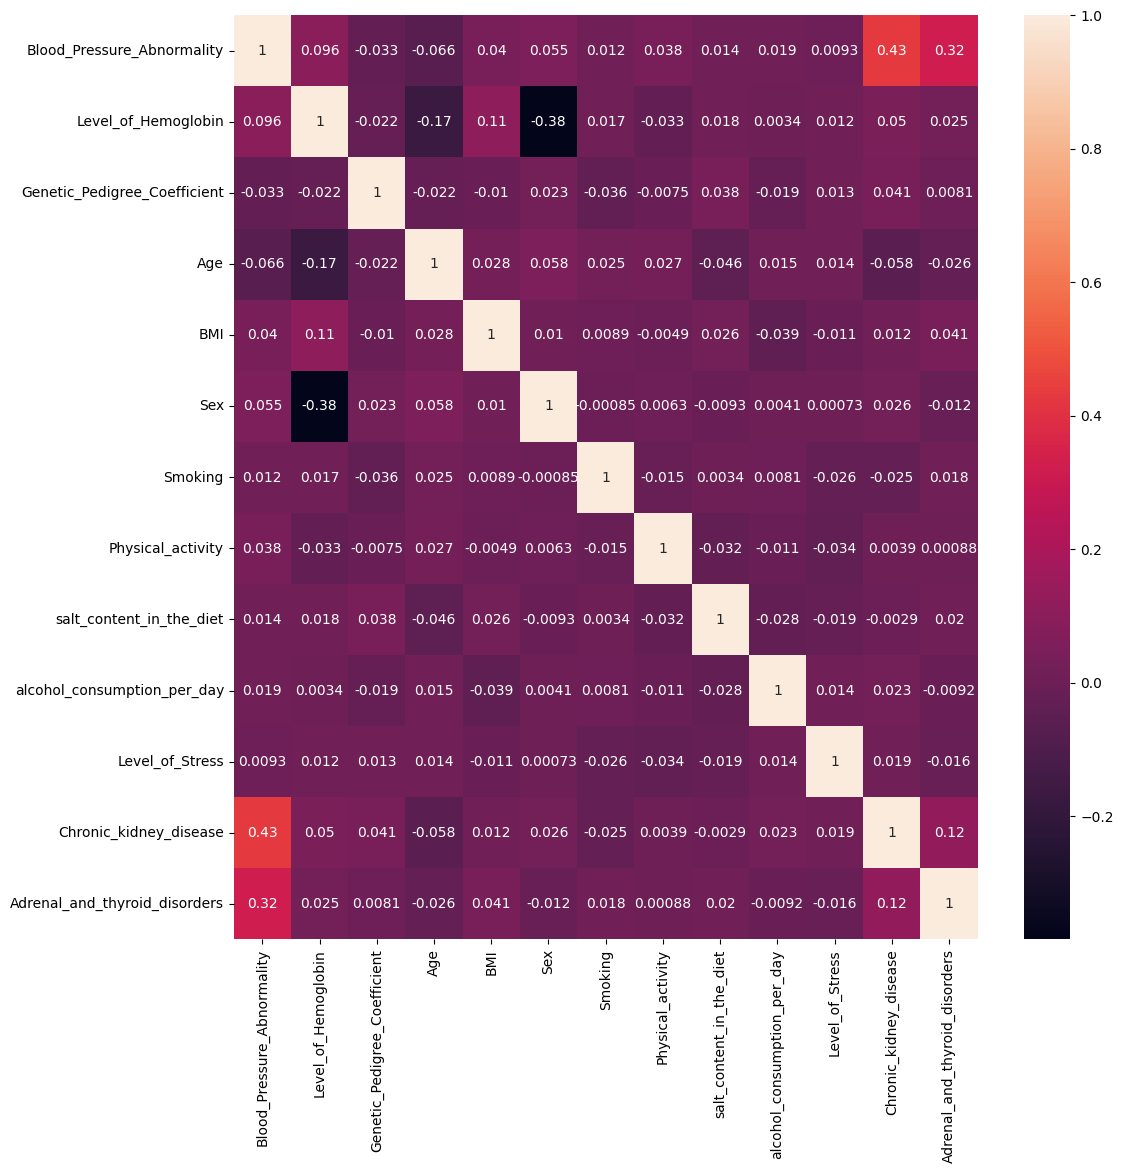

In [71]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_frame.corr(), annot= True)

In [72]:
# data_frame.plot(kind="scatter", x='Level_of_Hemoglobin', y='Blood_Pressure_Abnormality')
# plt.figure(figsize=(50, 5))
# plt.scatter(x=data_frame["Level_of_Hemoglobin"], y=data_frame["Blood_Pressure_Abnormality"])
# plt.title("Relation Between Level Of Hemoglobin and Blood Pressure")
# plt.xlabel('Level of Hemoglobin')
# plt.ylabel('Blood Pressure Abnormality')
# plt.show()

Text(0.5, 1.0, 'Relation between Adrenal & Thyroid Disorders and Abnormal blood pressure')

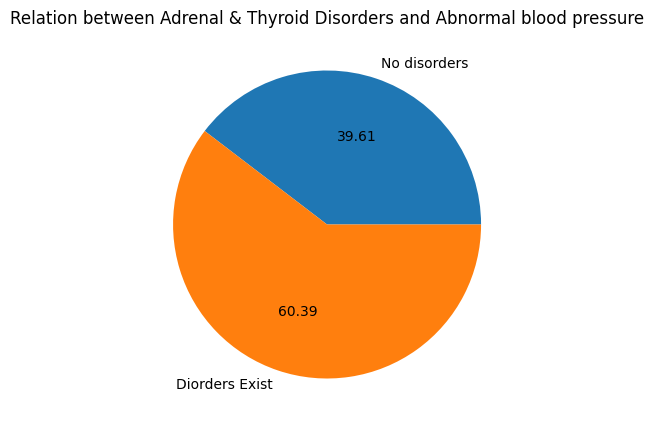

In [73]:
# we notice that 60% of people with thyroid and adrenal problems have an abnormal blood pressure level and 40% not
abnormalPatients = data_frame[data_frame['Blood_Pressure_Abnormality']==1]
sexGroups = abnormalPatients.groupby('Adrenal_and_thyroid_disorders')
labs = 'No disorders','Diorders Exist'
sexGroups.size().plot(kind = 'pie',autopct = '%.2f',labels = labs)
plt.title("Relation between Adrenal & Thyroid Disorders and Abnormal blood pressure")

{'whiskers': [<matplotlib.lines.Line2D at 0x19b38b01a10>,
 'caps': [<matplotlib.lines.Line2D at 0x19b381634d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b38b87cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x19b389c07d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b389fb2d0>],
 'means': []}

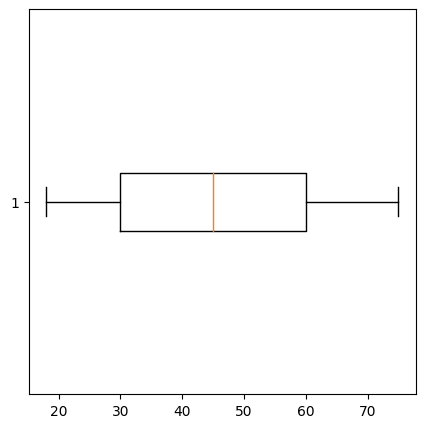

In [74]:
#this plot shows the ages of people who have abnormal blood pressure
#50% of people are between the ages of 25 and 75
#25% are under the age of 25 and 25% are over the age 75 
abnormalBoxPlot=data_frame[data_frame['Blood_Pressure_Abnormality']==1]
plt.boxplot(abnormalBoxPlot['Age'],vert=False)

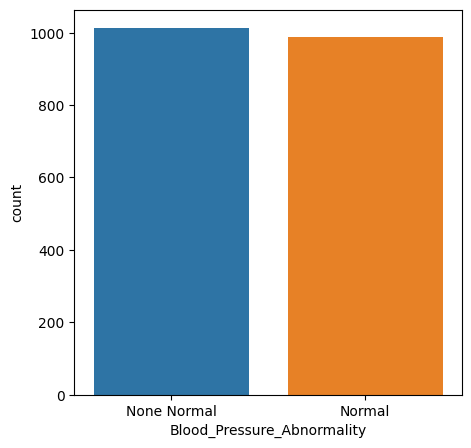

In [75]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = "Blood_Pressure_Abnormality",data= data_frame, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["None Normal", "Normal"])
plt.show()

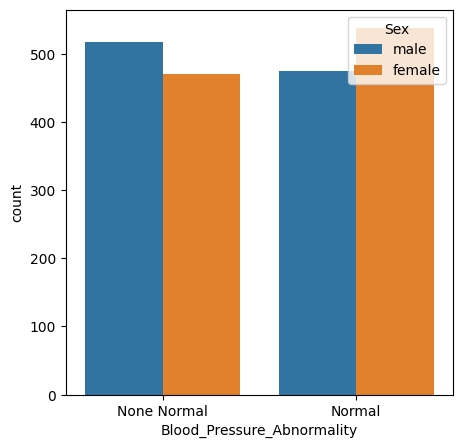

In [76]:
# .............................multiple par chart................. #
sns.countplot(x='Blood_Pressure_Abnormality', data=data_frame.replace({1:'male', 0:'female'}), hue='Sex')
plt.xticks(ticks=[0, 1], labels = ["None Normal", "Normal"])
plt.show()

In [77]:
scaler = MinMaxScaler()
names = data_frame.columns
d = scaler.fit_transform(data_frame)
data_frame = pd.DataFrame(d, columns=names)

In [78]:
# Since the range of values of raw data varies widely
# Normalize the range of independent variables or features of data 
# feature scaling can be done by Standardization or normalization

# dataset before feature scaling:
data_frame.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1.0,0.367206,0.90,0.280702,0.325,1.0,0.0,0.918565,0.961865,0.503023,0.5,1.0,1.0
1,0.0,0.190531,0.23,0.631579,0.575,1.0,0.0,0.516251,0.506686,0.410822,1.0,0.0,0.0
2,1.0,0.310624,0.91,0.912281,0.975,0.0,0.0,0.189800,0.589402,0.134269,0.5,1.0,0.0
3,0.0,0.334873,0.43,0.929825,1.000,0.0,0.0,0.202768,0.148477,0.484970,0.0,1.0,0.0
4,1.0,0.700924,0.83,0.596491,0.225,0.0,0.0,0.303757,0.993354,0.795591,0.5,0.0,0.0


In [79]:
data_input = data_frame.drop(columns=['Blood_Pressure_Abnormality'])
# data_input = data_frame[['Chronic_kidney_disease','Adrenal_and_thyroid_disorders']]
data_output = data_frame['Blood_Pressure_Abnormality']

In [150]:
# split Data
X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, test_size = 0.2, stratify=data_output, random_state=2)

In [152]:
print("X_train : ", X_train.shape)
print("Y_train : ", Y_train.shape)
print("X_test : ", X_test.shape)
print("Y_test : ", Y_test.shape)

X_train :  (1600, 12)
Y_train :  (1600,)
X_test :  (400, 12)
Y_test :  (400,)


### MODEL

In [125]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [162]:
model_svm = SVC()
model_svm.fit(X_train, Y_train)

SVC()

In [163]:

# Making Prediction
pred_svm = model_svm.predict(X_test)

# Calculating Accuracy Score
sv = accuracy_score(Y_test, pred_svm)
print(sv)

0.78


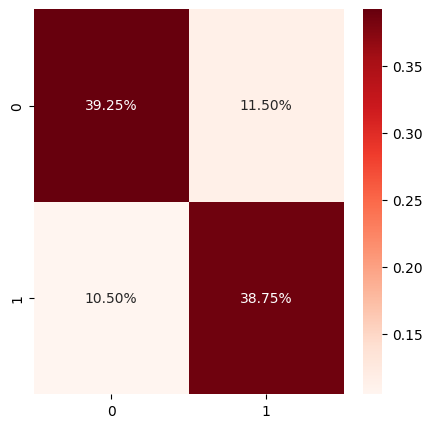

In [164]:
# confusion Maxtrix
cm1 = confusion_matrix(Y_test, pred_svm)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Creating model object
model_lg = LogisticRegression()

# Training Model
model_lg.fit(X_train, Y_train)
LogisticRegression()

# Making Prediction
pred_lg = model_lg.predict(X_test)

# Calculating Accuracy Score
lg = accuracy_score(Y_test, pred_lg)
print(lg)
print(classification_report(Y_test,pred_lg))


0.705
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70       203
         1.0       0.69      0.73      0.71       197

    accuracy                           0.70       400
   macro avg       0.71      0.71      0.70       400
weighted avg       0.71      0.70      0.70       400



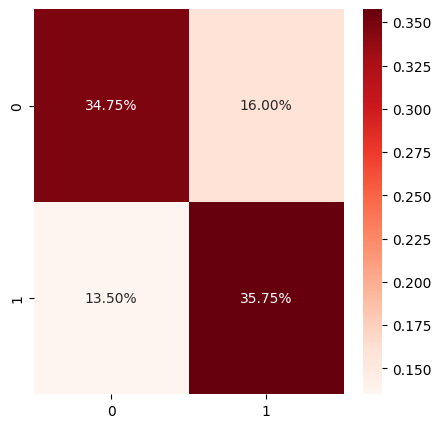

In [166]:
# confusion Maxtrix
cm2 = confusion_matrix(Y_test, pred_lg)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [167]:
from sklearn.ensemble import RandomForestClassifier
# Creating model object
model_rf = RandomForestClassifier()
# Training Model
model_rf.fit(X_train, Y_train)
RandomForestClassifier()

# Making Prediction
pred_rf = model_rf.predict(X_test)

# Calculating Accuracy Score
rf = accuracy_score(Y_test, pred_rf)

print(rf)
print(classification_report(Y_test, pred_rf))


0.8775
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       203
         1.0       0.87      0.88      0.88       197

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



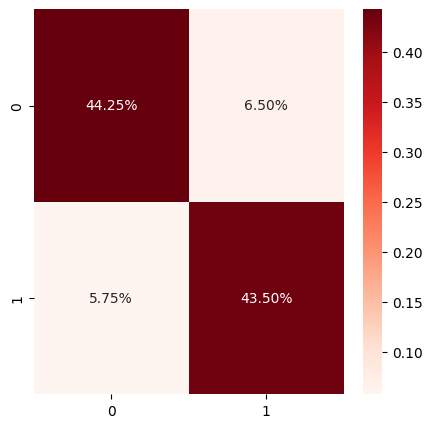

In [168]:
# confusion Maxtrix
cm3 = confusion_matrix(Y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [169]:
from sklearn.tree import DecisionTreeClassifier

# Creating model object
model_dt = DecisionTreeClassifier()

# Training Model
model_dt.fit(X_train, Y_train)

# Making Prediction
pred_dt = model_dt.predict(X_test)

# Calculating Accuracy Score
dt = accuracy_score(Y_test, pred_dt)

print("", dt)
print(classification_report(Y_test, pred_dt))

 0.7975
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       203
         1.0       0.81      0.77      0.79       197

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



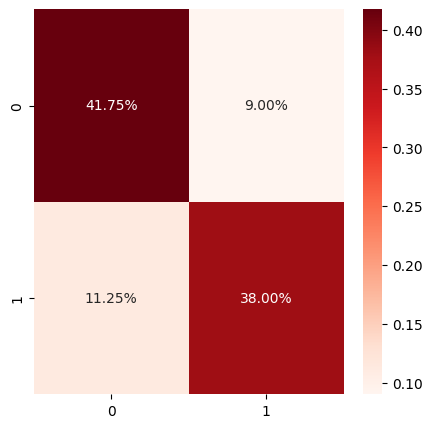

In [170]:
# confusion Maxtrix
cm4 = confusion_matrix(Y_test, pred_dt)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

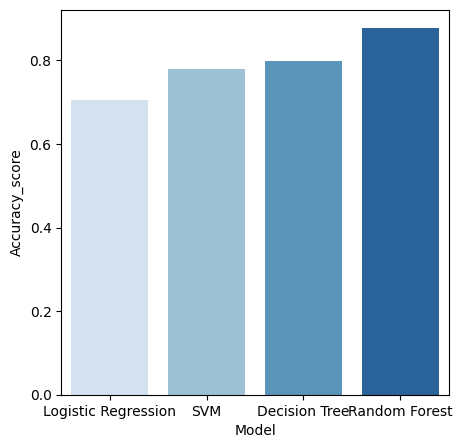

In [171]:
models = pd.DataFrame({
    'Model': ['SVM','Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy_score' :[sv, lg, rf, dt] 
})

models.sort_values(by='Accuracy_score', inplace=True)
sns.barplot(x='Model', y='Accuracy_score', data=models, palette = "Blues")
plt.show()